In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn import metrics

from helpers.regression import regression as RegressionHelper

%matplotlib inline

PATH_DATA_CASES = './data/computed/cases.csv'

## Read data for number of cases and possible features + remove datasets with missing values

In [2]:
df = pd.read_csv(PATH_DATA_CASES)
df.dropna(inplace=True)

In [3]:
print(df.shape)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

(163, 9)


,total_cases,total_cases_per_million,gdp_per_capita,health_expenditure_5y_avg,Population density (people per sq. km of land area),lockdown_type,"International tourism, expenditures (% of total imports)"
total_cases,1.00,0.25,0.17,0.31,-0.02,0.08,0.03
total_cases_per_million,0.25,1.00,0.62,0.07,0.19,0.14,0.28
gdp_per_capita,0.17,0.62,1.00,0.20,0.28,0.30,0.20
health_expenditure_5y_avg,0.31,0.07,0.20,1.00,-0.06,0.17,0.05
Population density (people per sq. km of land area),-0.02,0.19,0.28,-0.06,1.00,0.03,0.03
lockdown_type,0.08,0.14,0.30,0.17,0.03,1.00,0.04
"International tourism, expenditures (% of total imports)",0.03,0.28,0.20,0.05,0.03,0.04,1.00


In [4]:
df.describe()

,total_cases,total_cases_per_million,gdp_per_capita,health_expenditure_5y_avg,Population density (people per sq. km of land area),lockdown_type,"International tourism, expenditures (% of total imports)"
count,1.630000e+02,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,5.401614e+04,1721.695454,19154.336908,6.458670,215.133291,0.684049,6.191332
std,2.118348e+05,3272.239036,19904.861742,2.522083,667.971201,0.437293,4.531365
min,4.000000e+00,1.867000,661.240000,2.224253,2.040609,0.000000,0.028524
25%,7.950000e+02,120.187000,4711.600500,4.539472,37.416563,0.000000,2.963447
50%,4.121000e+03,457.004000,12294.876000,6.289129,84.605985,1.000000,5.436048
75%,2.706100e+04,2026.134000,27467.146000,8.156820,207.885273,1.000000,8.817263
max,2.312302e+06,30684.193000,116935.600000,16.795518,7952.998418,1.000000,21.933781


In [5]:
df_with_countries = df.copy()
df.drop(["iso_code", "location", "total_cases"], axis=1, inplace=True)

## Linear Regression

Mean Absolute Error: 1779.4370819997825
Mean Squared Error: 8628627.275297614
Root Mean Squared Error: 2937.4525145604675
R2 Score: 0.225188102071044


LinearRegression()

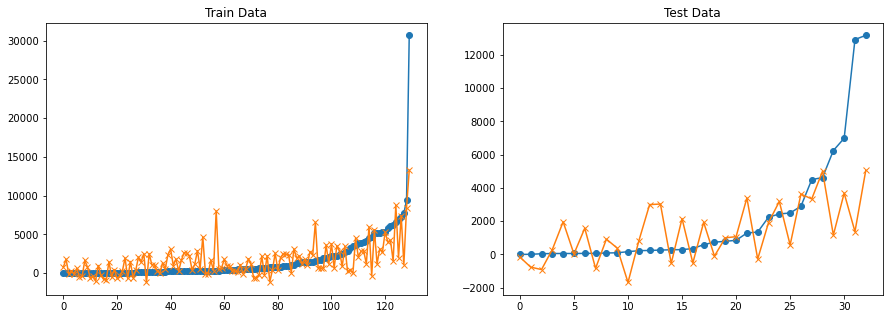

In [6]:
X = df.drop("total_cases_per_million", axis=1)
y = df["total_cases_per_million"]

RegressionHelper(X, y, LinearRegression(), 0.2, 42)

uff

In [7]:
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled, columns=["total_cases_per_million", "gdp_per_capita",
                                            "health_expenditure_5y_avg","Population density (people per sq. km of land area)",
                                            "lockdown_type", "International tourism, expenditures (% of total imports)"])

x_normalized = normalize(df.values, axis=0, norm='max')
df_normalized = pd.DataFrame(x_normalized, columns=["total_cases_per_million", "gdp_per_capita",
                                            "health_expenditure_5y_avg","Population density (people per sq. km of land area)",
                                            "lockdown_type", "International tourism, expenditures (% of total imports)"])

#df_scaled.describe()
#df_normalized.describe()

In [8]:
X_scaled = df_scaled.drop("total_cases_per_million", axis=1)
y_scaled = df_scaled["total_cases_per_million"]

X_normalized = df_normalized.drop("total_cases_per_million", axis=1)
y_normalized = df_normalized["total_cases_per_million"]

In [9]:
poly3 = PolynomialFeatures(3)
x_poly_scaled = poly3.fit_transform(X_scaled)
df_poly_scaled = pd.DataFrame(x_poly_scaled)
X_poly_scaled = df_poly_scaled

x_poly_normalized = poly3.fit_transform(X_normalized)
df_poly_normalized = pd.DataFrame(x_poly_normalized)
X_poly_normalized = df_poly_normalized

Mean Absolute Error: 0.1101289855931351
Mean Squared Error: 0.07065942222920925
Root Mean Squared Error: 0.2658184008476638
R2 Score: -4.973119638976623


LinearRegression()

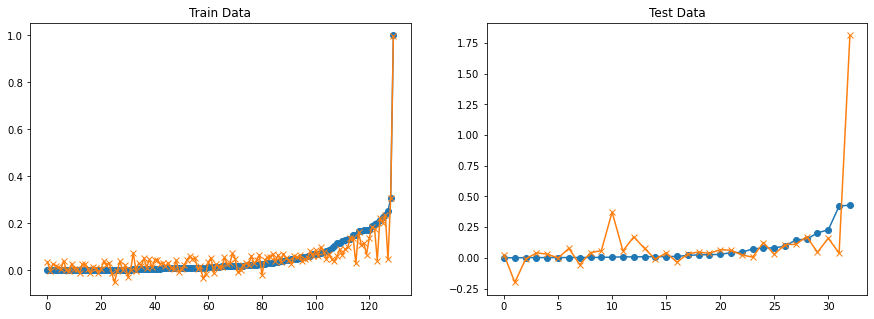

In [10]:
RegressionHelper(X_poly_scaled, y_scaled, LinearRegression(), 0.2, 42)

Mean Absolute Error: 0.11080359442612173
Mean Squared Error: 0.07367895944701952
Root Mean Squared Error: 0.27143868450723735
R2 Score: -5.229131037059607


LinearRegression()

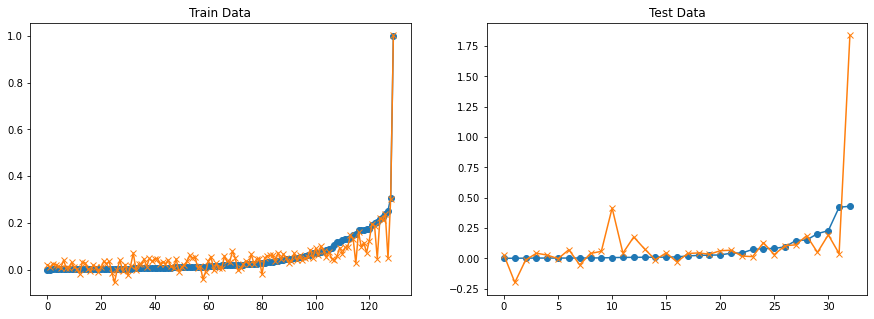

In [11]:
RegressionHelper(X_poly_normalized, y_normalized, LinearRegression(), 0.2, 42)

Normalization and scaling don't differ that much. Normalization is recommended for sparse datasets, standardization for gaussian distributions. We use rescaling because it's most simple and should work for us.

But we see some overfitting, because we have around 130 training datasets but due to polynomial features (with dimension 3) 56 features. Thus we need to decrease the number of features and decide for just 2 dimensions when applying polynomial features.

Mean Absolute Error: 0.04322312020445667
Mean Squared Error: 0.004213659444334995
Root Mean Squared Error: 0.06491270633962964
R2 Score: -0.12236457766067588


LinearRegression()

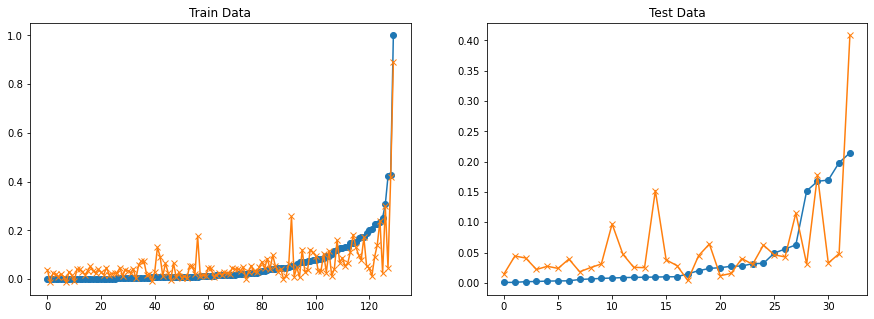

In [12]:
poly2 = PolynomialFeatures(2)
x_poly2_scaled = poly2.fit_transform(X_scaled)
df_poly2_scaled = pd.DataFrame(x_poly2_scaled)
X_poly2_scaled = df_poly2_scaled

RegressionHelper(X_poly2_scaled, y_scaled, LinearRegression(), 0.2, 25)

## Decision Tree

Mean Absolute Error: 0.06480500839275985
Mean Squared Error: 0.01398964519197091
Root Mean Squared Error: 0.11827783051768793
R2 Score: -2.7263291979181683


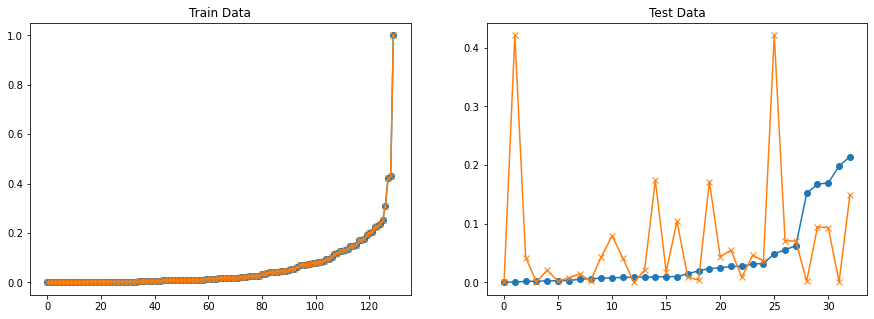

In [13]:
tree_1 = RegressionHelper(X_poly2_scaled, y_scaled, DecisionTreeRegressor(), 0.2, 25)

Works really good on train data... ;)

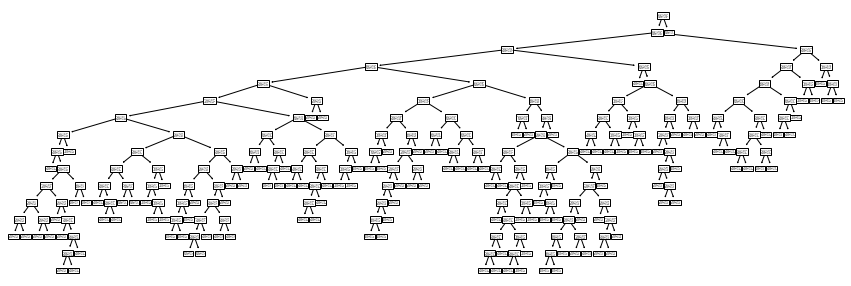

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
temp = plot_tree(tree_1, ax=ax)

maybe limit the depth of the tree...

Mean Absolute Error: 0.055475630162430574
Mean Squared Error: 0.009747760423410537
Root Mean Squared Error: 0.09873074710246316
R2 Score: -1.596446427455712


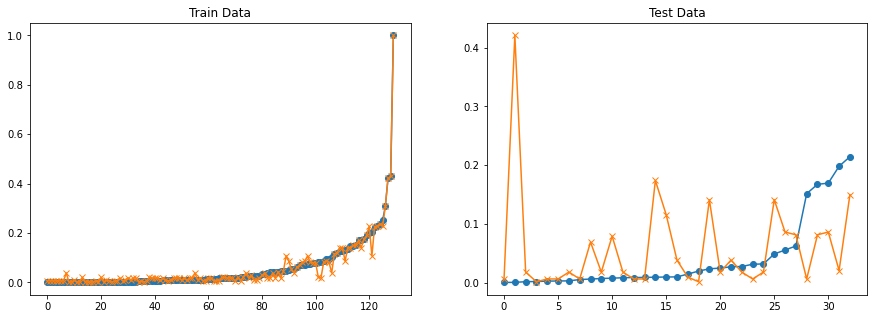

In [15]:
tree_regressor = RegressionHelper(X_poly2_scaled, y_scaled, DecisionTreeRegressor(max_depth=7), 0.2, 25)

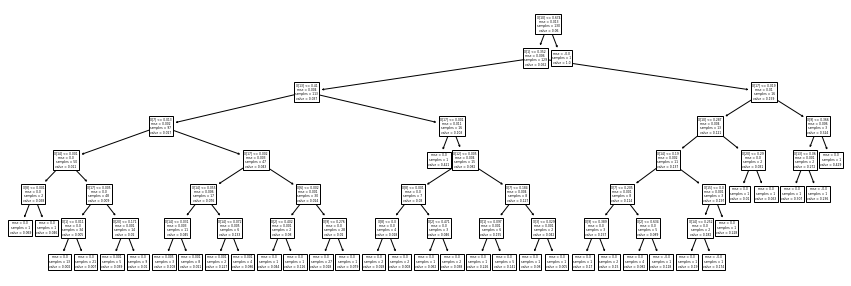

In [16]:
fig, ax = plt.subplots(figsize=(15,5))
temp = plot_tree(tree_regressor, ax=ax)

## Random Forest

Mean Absolute Error: 0.040374374781267104
Mean Squared Error: 0.00329060828610477
Root Mean Squared Error: 0.05736382384486559
R2 Score: 0.12350245005061722


RandomForestRegressor(max_depth=5, n_estimators=42)

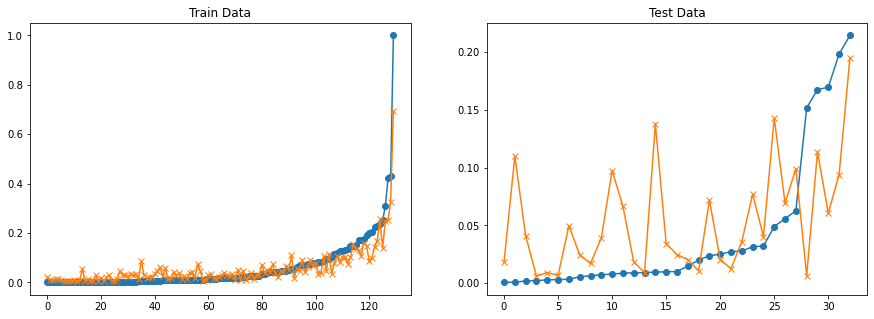

In [17]:
RegressionHelper(X_poly2_scaled, y_scaled, RandomForestRegressor(n_estimators=42, max_depth=5), 0.2, 25)

## Remove largest value

Mean Absolute Error: 0.10063012913132978
Mean Squared Error: 0.0245976791847381
Root Mean Squared Error: 0.15683647275024423
R2 Score: -0.08216869392382709


LinearRegression()

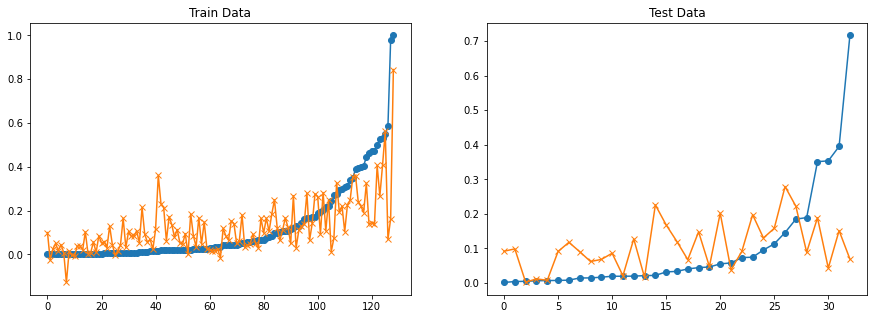

In [18]:
row_largest_value = df.nlargest(columns="total_cases_per_million",n=1).index[0]

x = df.drop(row_largest_value).values
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled, columns=["total_cases_per_million", "gdp_per_capita",
                                            "health_expenditure_5y_avg","Population density (people per sq. km of land area)",
                                            "lockdown_type", "International tourism, expenditures (% of total imports)"])
X_scaled = df_scaled.drop("total_cases_per_million", axis=1)
y_scaled = df_scaled["total_cases_per_million"]

poly2 = PolynomialFeatures(2)
x_poly2_scaled = poly2.fit_transform(X_scaled)
df_poly2_scaled = pd.DataFrame(x_poly2_scaled)
X_poly2_scaled = df_poly2_scaled

RegressionHelper(X_poly2_scaled, y_scaled, LinearRegression(), 0.2, 25)